# Concentration de CO2 dans l'atmosphère depuis 1958

In [73]:
%matplotlib inline
import numpy as np 
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

En 1958, Charles David Keeling a initié une mesure de la concentration de CO2 dans l'atmosphère à l'observatoire de Mauna Loa, Hawaii, États-Unis qui continue jusqu'à aujourd'hui. L'objectif initial était d'étudier la variation saisonnière, mais l'intérêt s'est déplacé plus tard vers l'étude de la tendance croissante dans le contexte du changement climatique. En honneur à Keeling, ce jeu de données est souvent appelé ["Keeling Curve"](https://en.wikipedia.org/wiki/Keeling_Curve).

## Evolution de la concentration en CO2 depuis 1958

Les données sont disponibles sur le [site Web de l'institut Scripps](https://scrippsco2.ucsd.edu/data/atmospheric_co2/primary_mlo_co2_record.html). Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine. Pour nous protéger contre une éventuelle disparition ou modification du serveur de l'institut Scripps, nous faisons une copie locale de ce jeux de données que nous préservons avec notre analyse. Il est inutile et même risquée de télécharger les données à chaque exécution, car dans le cas d'une panne nous pourrions remplacer nos données par un fichier défectueux. Pour cette raison, nous téléchargeons les données seulement si la copie locale n'existe pas.

In [2]:
data_url = "https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/weekly/weekly_in_situ_co2_mlo.csv"
data_file = "weekly_in_situ_co2_mlo.csv"

import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

Comme expliqué en entête du fichier de données CSV, les 43 premières lignes sont des commentaires détaillant l'explication des colonnes, nous les ignoront donc en précisant `skiprows=43`.

In [151]:
raw_data = pd.read_csv(data_file, encoding = 'iso-8859-1', skiprows=43)
raw_data


indicated by the date in the first column.                             
1958-03-29                                             316.19                       
1958-04-05                                             317.31                       
1958-04-12                                             317.69                       
1958-04-19                                             317.58                       
1958-04-26                                             316.48                       
1958-05-03                                             316.95                       
1958-05-17                                             317.56                       
1958-05-24                                             317.99                       
1958-07-05                                             315.85                       
1958-07-12                                             315.85                       
1958-07-19                                             315.46                       
1958-07-26                                             315.59                       
1958-08-02                                             315.64                       
1958-08-09                                             315.10                       
1958-08-16                                             315.09                       
1958-08-30                                             314.14                       
1958-09-06                                             313.54                       
1958-11-08                                             313.05                       
1958-11-15                                             313.26                       
1958-11-22                                             313.57                       
1958-11-29                                             314.01                       
1958-12-06                                             314.56                       
1958-12-13                                             314.41                       
1958-12-20                                             314.77                       
1958-12-27                                             315.21                       
1959-01-03                                             315.24                       
1959-01-10                                             315.50                       
1959-01-17                                             315.69                       
1959-01-24                                             315.86                       
1959-01-31                                             315.42                       
...                                                       ...                       
2022-04-09                                             419.38                       
2022-04-16                                             420.57                       
2022-04-23                                             420.11                       
2022-04-30                                             419.81                       
2022-05-07                                             419.64                       
2022-05-14                                             421.36                       
2022-05-21                                             420.55                       
2022-05-28                                             421.34                       
2022-06-04                                             421.18                       
2022-06-11                                             420.90                       
2022-06-18                                             420.45                       
2022-06-25                                             420.16                       
2022-07-02                                             419.89                       
2022-07-09                                             418.92                       
2022-07-16                                             418.47                       
2022-07-23        

The date has been wrongly imported as the index of the dataframe. Let's also add a column for the corresponding day of the year.

In [169]:
raw_data['date']=raw_data.index
raw_data

indicated by the date in the first column.                               \
1958-03-29                                             316.19                          
1958-04-05                                             317.31                          
1958-04-12                                             317.69                          
1958-04-19                                             317.58                          
1958-04-26                                             316.48                          
1958-05-03                                             316.95                          
1958-05-17                                             317.56                          
1958-05-24                                             317.99                          
1958-07-05                                             315.85                          
1958-07-12                                             315.85                          
1958-07-19                                             315.46                          
1958-07-26                                             315.59                          
1958-08-02                                             315.64                          
1958-08-09                                             315.10                          
1958-08-16                                             315.09                          
1958-08-30                                             314.14                          
1958-09-06                                             313.54                          
1958-11-08                                             313.05                          
1958-11-15                                             313.26                          
1958-11-22                                             313.57                          
1958-11-29                                             314.01                          
1958-12-06                                             314.56                          
1958-12-13                                             314.41                          
1958-12-20                                             314.77                          
1958-12-27                                             315.21                          
1959-01-03                                             315.24                          
1959-01-10                                             315.50                          
1959-01-17                                             315.69                          
1959-01-24                                             315.86                          
1959-01-31                                             315.42                          
...                                                       ...                          
2022-04-09                                             419.38                          
2022-04-16                                             420.57                          
2022-04-23                                             420.11                          
2022-04-30                                             419.81                          
2022-05-07                                             419.64                          
2022-05-14                                             421.36                          
2022-05-21                                             420.55                          
2022-05-28                                             421.34                          
2022-06-04                                             421.18                          
2022-06-11                                             420.90                          
2022-06-18                                             420.45                          
2022-06-25                                             420.16                          
2022-07-02                                             419.89                          
2022-07-09                                           

Renommons la colonnes de ce jeu de données afin qu'elle coïncide avec la description donnée en entête. La donnée intéressante que nous étudierons est contenue dans la seule colonne qui donne la concentration en $CO_2$ à Mauna Loa en micro-mole de $CO_2$ par mole (ppm). L'index de notre jeu de données est la date. De plus les relevés démarrent le 29 mars 1958, et comme les données sont mises à jour régulièrement, j'utiliserai la version des données disponible sur le site le 01/12/2022 afin d'assurer la reproductibilité de mes analyses. Mon analyse portera donc sur les données du 29 mars 1958 au 29 Octobre 2022.

In [170]:
data = raw_data.dropna().copy()
data.columns=['[ppm]','day']
data=data[0:3298]
data

[ppm]         day
1958-03-29  316.19  1958-03-29
1958-04-05  317.31  1958-04-05
1958-04-12  317.69  1958-04-12
1958-04-19  317.58  1958-04-19
1958-04-26  316.48  1958-04-26
1958-05-03  316.95  1958-05-03
1958-05-17  317.56  1958-05-17
1958-05-24  317.99  1958-05-24
1958-07-05  315.85  1958-07-05
1958-07-12  315.85  1958-07-12
1958-07-19  315.46  1958-07-19
1958-07-26  315.59  1958-07-26
1958-08-02  315.64  1958-08-02
1958-08-09  315.10  1958-08-09
1958-08-16  315.09  1958-08-16
1958-08-30  314.14  1958-08-30
1958-09-06  313.54  1958-09-06
1958-11-08  313.05  1958-11-08
1958-11-15  313.26  1958-11-15
1958-11-22  313.57  1958-11-22
1958-11-29  314.01  1958-11-29
1958-12-06  314.56  1958-12-06
1958-12-13  314.41  1958-12-13
1958-12-20  314.77  1958-12-20
1958-12-27  315.21  1958-12-27
1959-01-03  315.24  1959-01-03
1959-01-10  315.50  1959-01-10
1959-01-17  315.69  1959-01-17
1959-01-24  315.86  1959-01-24
1959-01-31  315.42  1959-01-31
...            ...         ...
2022-04-02  419.91  2022-04-02
2022-04-09  419.38  2022-04-09
2022-04-16  420.57  2022-04-16
2022-04-23  420.11  2022-04-23
2022-04-30  419.81  2022-04-30
2022-05-07  419.64  2022-05-07
2022-05-14  421.36  2022-05-14
2022-05-21  420.55  2022-05-21
2022-05-28  421.34  2022-05-28
2022-06-04  421.18  2022-06-04
2022-06-11  420.90  2022-06-11
2022-06-18  420.45  2022-06-18
2022-06-25  420.16  2022-06-25
2022-07-02  419.89  2022-07-02
2022-07-09  418.92  2022-07-09
2022-07-16  418.47  2022-07-16
2022-07-23  418.02  2022-07-23
2022-07-30  417.64  2022-07-30
2022-08-06  417.42  2022-08-06
2022-08-13  416.84  2022-08-13
2022-08-20  416.24  2022-08-20
2022-08-27  416.11  2022-08-27
2022-09-03  415.74  2022-09-03
2022-09-10  415.85  2022-09-10
2022-09-17  415.75  2022-09-17
2022-09-24  414.82  2022-09-24
2022-10-01  415.12  2022-10-01
2022-10-08  414.85  2022-10-08
2022-10-15  415.31  2022-10-15
2022-10-22  415.60  2022-10-22

[3298 rows x 2 columns]

Y a-t-il des points manquants dans ce jeux de données ?

In [171]:
data[data.isnull().any(axis=1)]

Empty DataFrame
Columns: [[ppm], day]
Index: []

Il n'existe pas de points manquants.

Afin de pouvoir traiter correctement les dates, il est nécessaire de convertir chaque chaîne de caractère en un format datetime compréhensible par pandas.

In [172]:
data['day'] = [pd.to_datetime(date_str) for date_str in data['day']]
data.index = [pd.to_datetime(date_str) for date_str in data.index]
data['day']=data['day'].dt.dayofyear
data

[ppm]  day
1958-03-29  316.19   88
1958-04-05  317.31   95
1958-04-12  317.69  102
1958-04-19  317.58  109
1958-04-26  316.48  116
1958-05-03  316.95  123
1958-05-17  317.56  137
1958-05-24  317.99  144
1958-07-05  315.85  186
1958-07-12  315.85  193
1958-07-19  315.46  200
1958-07-26  315.59  207
1958-08-02  315.64  214
1958-08-09  315.10  221
1958-08-16  315.09  228
1958-08-30  314.14  242
1958-09-06  313.54  249
1958-11-08  313.05  312
1958-11-15  313.26  319
1958-11-22  313.57  326
1958-11-29  314.01  333
1958-12-06  314.56  340
1958-12-13  314.41  347
1958-12-20  314.77  354
1958-12-27  315.21  361
1959-01-03  315.24    3
1959-01-10  315.50   10
1959-01-17  315.69   17
1959-01-24  315.86   24
1959-01-31  315.42   31
...            ...  ...
2022-04-02  419.91   92
2022-04-09  419.38   99
2022-04-16  420.57  106
2022-04-23  420.11  113
2022-04-30  419.81  120
2022-05-07  419.64  127
2022-05-14  421.36  134
2022-05-21  420.55  141
2022-05-28  421.34  148
2022-06-04  421.18  155
2022-06-11  420.90  162
2022-06-18  420.45  169
2022-06-25  420.16  176
2022-07-02  419.89  183
2022-07-09  418.92  190
2022-07-16  418.47  197
2022-07-23  418.02  204
2022-07-30  417.64  211
2022-08-06  417.42  218
2022-08-13  416.84  225
2022-08-20  416.24  232
2022-08-27  416.11  239
2022-09-03  415.74  246
2022-09-10  415.85  253
2022-09-17  415.75  260
2022-09-24  414.82  267
2022-10-01  415.12  274
2022-10-08  414.85  281
2022-10-15  415.31  288
2022-10-22  415.60  295

[3298 rows x 2 columns]

Nous vérifions la cohérence des données. Entre deux mesures, la différence temporelle doit être d'une semaine. Je décide de garder deux listes pour les années complètes et incomplètes en terme de mesure hebdomadaire. L'année 2022 doit être ajoutée manuellement car incomplète encore au temps de l'analyse.

In [356]:
date = data.index
incomplete_years=[]
years=np.arange(1958,2022)
for p1, p2 in zip(date[:-1], date[1:]):
    delta = p2 - p1
    if delta > pd.Timedelta(1,'W'):
        print(p1, p2, delta)
        if p1.year==p2.year:
            if p1.year not in incomplete_years:
                incomplete_years.append(p1.year)
        else:
            if p1.year not in incomplete_years:
                incomplete_years.append(p1.year)
            if p2.year not in incomplete_years:
                incomplete_years.append(p2.year)
incomplete_years.append(2022)
complete_years = [y for y in years if y not in incomplete_years]
print(incomplete_years)
print(complete_years)

1958-05-03 00:00:00 1958-05-17 00:00:00 14 days 00:00:00
1958-05-24 00:00:00 1958-07-05 00:00:00 42 days 00:00:00
1958-08-16 00:00:00 1958-08-30 00:00:00 14 days 00:00:00
1958-09-06 00:00:00 1958-11-08 00:00:00 63 days 00:00:00
1959-01-31 00:00:00 1959-02-14 00:00:00 14 days 00:00:00
1959-03-07 00:00:00 1959-03-21 00:00:00 14 days 00:00:00
1959-05-23 00:00:00 1959-06-06 00:00:00 14 days 00:00:00
1959-08-08 00:00:00 1959-08-22 00:00:00 14 days 00:00:00
1962-08-18 00:00:00 1962-09-15 00:00:00 28 days 00:00:00
1962-12-22 00:00:00 1963-01-05 00:00:00 14 days 00:00:00
1963-02-09 00:00:00 1963-02-23 00:00:00 14 days 00:00:00
1963-04-27 00:00:00 1963-05-11 00:00:00 14 days 00:00:00
1963-11-16 00:00:00 1963-11-30 00:00:00 14 days 00:00:00
1964-01-18 00:00:00 1964-05-30 00:00:00 133 days 00:00:00
1964-06-06 00:00:00 1964-06-27 00:00:00 21 days 00:00:00
1964-08-01 00:00:00 1964-08-15 00:00:00 14 days 00:00:00
1966-07-09 00:00:00 1966-08-06 00:00:00 28 days 00:00:00
1966-10-29 00:00:00 1966-11-12

Nous remarquons que beaucoup de semaines (voir mois pour l'année 1964) n'ont pas été mesurées mais cette quantité reste cependant faible devant la plage temporelle et la grandeur du jeu de donnée considéré (3299 mesures).

Regardons l'évolution hebdomadaire de la concentration de $CO_2$.

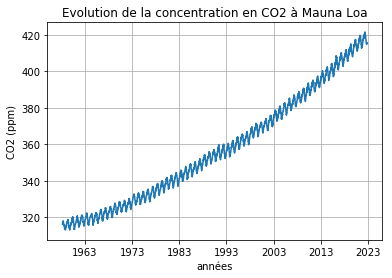

In [174]:
t = date
ppm = data['[ppm]']
fig, ax = plt.subplots()
ax.plot(t, ppm)

ax.set(xlabel='années', ylabel='CO2 (ppm)',
       title='Evolution de la concentration en CO2 à Mauna Loa')
ax.grid()

plt.show()


Premièrement, on peut constater que les données manquantes influent en effet peu sur la visualisation globale de l'évolution 
de la concentration en $CO_2$ à Mauna Loa. De plus, on observe une nette augmentation qui peut se découper en deux phénomènes : une oscillation périodique superposée à une évolution systématique plus lente.

## Etude de l'oscillation périodique

L'oscillation périodique de faible amplitude semble a priori découler de phénomènes saisonnier identiques d'une année à l'autre. Observons quelques années spécifiques pour s'en rendre compte. Nous choisissons les années 1965 et 1999 où les données hebdomadaires sont complètes.

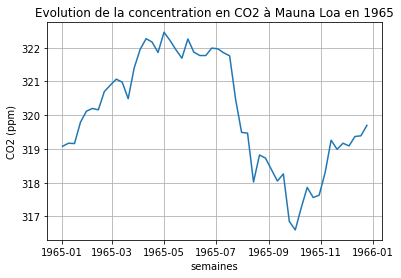

In [175]:
ppm_1965 = data.loc['1965-01-01':'1965-12-31']
ppm_1965

fig, ax = plt.subplots()
ax.plot(ppm_1965.index, ppm_1965['[ppm]'])

ax.set(xlabel='semaines', ylabel='CO2 (ppm)',
       title='Evolution de la concentration en CO2 à Mauna Loa en 1965')
ax.grid()

plt.show()

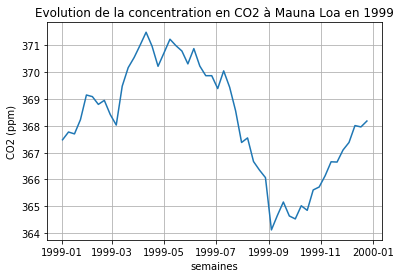

In [176]:
ppm_1999 = data.loc['1999-01-01':'1999-12-31']
ppm_1999

fig, ax = plt.subplots()
ax.plot(ppm_1999.index, ppm_1999['[ppm]'])

ax.set(xlabel='semaines', ylabel='CO2 (ppm)',
       title='Evolution de la concentration en CO2 à Mauna Loa en 1999')
ax.grid()

plt.show()

On constate bien pour ces deux années une tendance similaire qui se dégage.  

Afin de n'analyser que la composante saisonnière, je crée un jeu de données en soustrayant à chaque mesure 
la concentration moyenne annuelle. Les années incomplètes sont d'abord ignorées dans un nouveau jeu de données.

In [295]:
seasonal_data=data.dropna().copy()
seasonal_data=seasonal_data.drop(seasonal_data[seasonal_data.index.year.isin(incomplete_years)].index)
seasonal_data

[ppm]  day
1960-01-02  315.72    2
1960-01-09  316.40    9
1960-01-16  316.73   16
1960-01-23  316.57   23
1960-01-30  316.68   30
1960-02-06  316.61   37
1960-02-13  316.98   44
1960-02-20  317.42   51
1960-02-27  317.00   58
1960-03-05  316.96   65
1960-03-12  317.76   72
1960-03-19  318.07   79
1960-03-26  317.77   86
1960-04-02  318.61   93
1960-04-09  319.34  100
1960-04-16  319.01  107
1960-04-23  319.03  114
1960-04-30  319.77  121
1960-05-07  319.96  128
1960-05-14  319.82  135
1960-05-21  320.04  142
1960-05-28  320.06  149
1960-06-04  319.46  156
1960-06-11  320.08  163
1960-06-18  319.42  170
1960-06-25  319.09  177
1960-07-02  318.18  184
1960-07-09  318.64  191
1960-07-16  318.41  198
1960-07-23  317.91  205
...            ...  ...
2021-06-05  419.46  156
2021-06-12  418.90  163
2021-06-19  418.49  170
2021-06-26  417.82  177
2021-07-03  417.70  184
2021-07-10  417.08  191
2021-07-17  416.91  198
2021-07-24  415.92  205
2021-07-31  414.94  212
2021-08-07  414.56  219
2021-08-14  414.66  226
2021-08-21  414.42  233
2021-08-28  412.68  240
2021-09-04  412.58  247
2021-09-11  413.15  254
2021-09-18  413.09  261
2021-09-25  413.05  268
2021-10-02  413.05  275
2021-10-09  413.56  282
2021-10-16  413.97  289
2021-10-23  413.97  296
2021-10-30  413.64  303
2021-11-06  414.32  310
2021-11-13  414.77  317
2021-11-20  414.91  324
2021-11-27  415.59  331
2021-12-04  415.77  338
2021-12-11  415.91  345
2021-12-18  416.58  352
2021-12-25  417.36  359

[2505 rows x 2 columns]

Puis j'enlève la moyenne annuelle à chaque concentration.

In [314]:
seasonal_data['[ppm]']=seasonal_data.loc[:,seasonal_data.columns == '[ppm]'].sub(seasonal_data.loc[:,seasonal_data.columns == '[ppm]'].groupby(seasonal_data.index.year).transform('mean'))
seasonal_data

[ppm]  day
1960-01-02 -1.178868    2
1960-01-09 -0.498868    9
1960-01-16 -0.168868   16
1960-01-23 -0.328868   23
1960-01-30 -0.218868   30
1960-02-06 -0.288868   37
1960-02-13  0.081132   44
1960-02-20  0.521132   51
1960-02-27  0.101132   58
1960-03-05  0.061132   65
1960-03-12  0.861132   72
1960-03-19  1.171132   79
1960-03-26  0.871132   86
1960-04-02  1.711132   93
1960-04-09  2.441132  100
1960-04-16  2.111132  107
1960-04-23  2.131132  114
1960-04-30  2.871132  121
1960-05-07  3.061132  128
1960-05-14  2.921132  135
1960-05-21  3.141132  142
1960-05-28  3.161132  149
1960-06-04  2.561132  156
1960-06-11  3.181132  163
1960-06-18  2.521132  170
1960-06-25  2.191132  177
1960-07-02  1.281132  184
1960-07-09  1.741132  191
1960-07-16  1.511132  198
1960-07-23  1.011132  205
...              ...  ...
2021-06-05  3.374231  156
2021-06-12  2.814231  163
2021-06-19  2.404231  170
2021-06-26  1.734231  177
2021-07-03  1.614231  184
2021-07-10  0.994231  191
2021-07-17  0.824231  198
2021-07-24 -0.165769  205
2021-07-31 -1.145769  212
2021-08-07 -1.525769  219
2021-08-14 -1.425769  226
2021-08-21 -1.665769  233
2021-08-28 -3.405769  240
2021-09-04 -3.505769  247
2021-09-11 -2.935769  254
2021-09-18 -2.995769  261
2021-09-25 -3.035769  268
2021-10-02 -3.035769  275
2021-10-09 -2.525769  282
2021-10-16 -2.115769  289
2021-10-23 -2.115769  296
2021-10-30 -2.445769  303
2021-11-06 -1.765769  310
2021-11-13 -1.315769  317
2021-11-20 -1.175769  324
2021-11-27 -0.495769  331
2021-12-04 -0.315769  338
2021-12-11 -0.175769  345
2021-12-18  0.494231  352
2021-12-25  1.274231  359

[2505 rows x 2 columns]

Basé sur le modèle proposé par [Keeling et al.](https://www.rescuethatfrog.com/wp-content/uploads/2017/03/Keeling-et-al-1976-no2.pdf) en 1976, la variation saisonnière proposé est la suivante (on approximera les années bisextiles à 365 jours) : 

$[ppm](t)=a.\sin(\frac{2\pi t}{365})+b.\cos(\frac{2\pi t}{365})+c.\sin(\frac{4\pi t}{365})+d.\cos(\frac{4\pi t}{365})$

avec $t$ le jour de l'année et $(a,b,c,d)$ le tuple de coefficient inconnus en $ppm$.

Observons la variation saisonnière uniquement pour les deux années considérées 1965 et 1999 et essayons de l'approximer au modèle en utilisant un estimateur des moindres carrés (via la fonction `curve_fit` de `scipy.optimize`).

In [329]:
ppm_1965_seasonal = seasonal_data.loc['1965-01-01':'1965-12-31']
ppm_1999_seasonal = seasonal_data.loc['1999-01-01':'1999-12-31']

In [324]:
def func(t,a,b,c,d):
    return a*np.sin(2*np.pi*t/365.0)+b*np.cos(2*np.pi*t/365.0)+c*np.sin(4*np.pi*t/365.0)+d*np.cos(4*np.pi*t/365.0)

In [330]:
popt_1965, pcov_1965 = curve_fit(func, ppm_1965_seasonal['day'], ppm_1965_seasonal['[ppm]'])
popt_1999, pcov_1999 = curve_fit(func, ppm_1999_seasonal['day'], ppm_1999_seasonal['[ppm]'])

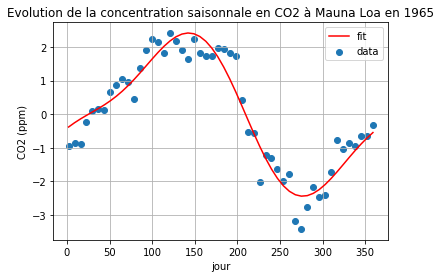

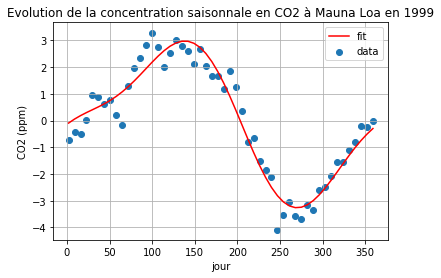

In [345]:

plt.scatter(ppm_1965_seasonal['day'], ppm_1965_seasonal['[ppm]'],label='data')
plt.plot(ppm_1965_seasonal['day'], func(ppm_1965_seasonal['day'], *popt_1965), 'r-',label='fit')
plt.xlabel('jour')
plt.ylabel('CO2 (ppm)')
plt.title('Evolution de la concentration saisonnale en CO2 à Mauna Loa en 1965')
plt.grid()
plt.legend()
plt.show()


plt.scatter(ppm_1999_seasonal['day'], ppm_1999_seasonal['[ppm]'],label='data')
plt.plot(ppm_1999_seasonal['day'], func(ppm_1999_seasonal['day'], *popt_1999), 'r-',label='fit')
plt.xlabel('jour')
plt.ylabel('CO2 (ppm)')
plt.title('Evolution de la concentration saisonnale en CO2 à Mauna Loa en 1999')
plt.grid()
plt.legend()
plt.show()


Le modèle proposé semble satisfaisant pour les deux années proposées, on peut notamment regarder la déviation standard associé au calcul de l'estimateur pour les deux années :

In [348]:
perr_1965 = np.sqrt(np.diag(pcov_1965))
perr_1999 = np.sqrt(np.diag(pcov_1999))
print(perr_1965)
print(perr_1999)

[0.09481993 0.09508224 0.09481995 0.09508223]
[0.10420458 0.10449285 0.1042046  0.10449284]


Pour les années 1965 et 1999, l'erreur de deviation standard ne dépasse pas environ 10%. Cependant comme on peut le constater, les valeurs des paramètres $(a,b,c,d)$ sont bien différentes d'une année à l'autre à cause des grandes incertitudes hebdomadaires sur la mesure.

In [350]:
print(popt_1965)
print(popt_1999)

[ 1.91310813 -0.94674625 -0.37797862  0.52541981]
[ 2.57056481 -0.81960095 -0.57928076  0.67984334]


Le modèle proposé semble satisfaisant mais il faudrait pouvoir trouver une valeur unique pour le tuple $(a,b,c,d)$ qui donnerait une bonne estimation sur l'ensemble des mesures. 

La valeur optimale que j'ai choisi pour le tuple $(a,b,c,d)$ est la moyenne arithmétique de tout les tuples $(a,b,c,d)$ calculables (avec une année complète de mesures hebdomadaires disponible). Vérifions que cette approximation est de bonne qualité.

Pour la calculer je définis d'abord une fonction qui me calcule ce tuple pour une année $n$ quelconque.

In [373]:
def parameter_fit_func(year):
    ppm_seasonal = seasonal_data.loc[np.str(year)+'-01-01':np.str(year)+'-12-31']
    popt,pcov=curve_fit(func, ppm_seasonal['day'], ppm_seasonal['[ppm]'])
    return(pcov,popt)

Je calcule l'erreur standard et les paramètres du modèle pour chaque année complète de mesure.

In [428]:
perr_list=[]
popt_list=[]
for y in complete_years:
    pcov,popt=parameter_fit_func(y)
    perr_list.append(np.sqrt(np.diag(pcov)))
    popt_list.append(popt)
#print(pcov_list)
#print(popt_list)

Les valeurs choisies pour le tuple $(a,b,c,d)$ sont donc :

In [425]:
norm_popt=np.mean(popt_list, axis=0)
norm_popt

array([ 2.16840988, -1.00351247, -0.72485854,  0.67409739])

On peut également constater que le modèle proposé correspond bien au comportement sur l'ensemble du jeu de données avec une déviation standard qui ne dépasse pas en moyenne 9%.

In [430]:
norm_pcov=np.mean(perr_list, axis=0)
norm_pcov

array([0.08913176, 0.08905876, 0.08913162, 0.08905892])

On peut donc définir notre fonction de la variation saisonnière de la concentration en $CO_2$

In [487]:
def ppm_seasonal(t):
    return 2.16840988*np.sin(2*np.pi*t/365.0)-1.00351247*np.cos(2*np.pi*t/365.0)-0.72485854*np.sin(4*np.pi*t/365.0)+0.67409739*np.cos(4*np.pi*t/365.0)

On pose comme origine des temps des jours le premier jour de la prémière année de mesure (1958). Attention le premier point de mesure ne correspond pas au premier jour de l'année comme c'était le cas lors du calcul des paramètres du modèle. Je dois donc décaler ma variable temporelle de 88 jours. On trace ensuite la variation saisonnière depuis 1958 jusqu'à 2022.

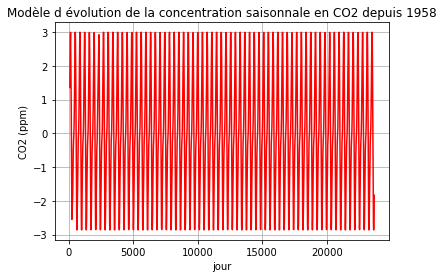

In [488]:
t=(date-date[0]).days+date[0].dayofyear
plt.plot(t, ppm_seasonal(t), 'r-')
plt.xlabel('jour')
plt.ylabel('CO2 (ppm)')
plt.title('Modèle d évolution de la concentration saisonnale en CO2 depuis 1958')
plt.grid()
plt.show()

## Etude de l'évolution systématique

La deuxième composante d'évolution de la concentration en $CO_2$ mesurée est une variation plus lente qui découle de l'augmentation des émissions de gaz à effet de serre.

Afin de tracer cette évolution, je retire à chaque point de mesure son évolution saisonnière calculée grâce au modèle précédent.

In [500]:
global_data=data.dropna().copy()
global_data['[ppm]']=global_data['[ppm]']-ppm_seasonal(global_data['day'])
global_data

[ppm]  day
1958-03-29  314.831915   88
1958-04-05  315.656534   95
1958-04-12  315.740230  102
1958-04-19  315.346344  109
1958-04-26  313.988955  116
1958-05-03  314.242099  123
1958-05-17  314.591137  137
1958-05-24  314.997873  144
1958-07-05  314.396800  186
1958-07-12  314.878479  193
1958-07-19  315.000448  200
1958-07-26  315.655344  207
1958-08-02  316.225253  214
1958-08-09  316.182570  221
1958-08-16  316.630830  228
1958-08-30  316.424572  242
1958-09-06  316.089238  249
1958-11-08  314.846839  312
1958-11-15  314.792063  319
1958-11-22  314.846074  326
1958-11-29  315.048749  333
1958-12-06  315.387549  340
1958-12-13  315.057173  347
1958-12-20  315.269398  354
1958-12-27  315.593103  361
1959-01-03  315.534471    3
1959-01-10  315.727364   10
1959-01-17  315.863840   17
1959-01-24  315.984786   24
1959-01-31  315.490618   31
...                ...  ...
2022-04-02  418.383973   92
2022-04-09  417.556500   99
2022-04-16  418.455594  106
2022-04-23  417.725110  113
2022-04-30  417.189199  120
2022-05-07  416.831513  127
2022-05-14  418.424413  134
2022-05-21  417.558233  141
2022-05-28  418.370640  148
2022-06-04  418.316129  155
2022-06-11  418.225674  162
2022-06-18  418.046575  169
2022-06-25  418.102490  176
2022-07-02  418.243668  183
2022-07-09  417.737364  190
2022-07-16  417.788416  197
2022-07-23  417.859952  204
2022-07-30  418.004192  211
2022-08-06  418.293293  218
2022-08-13  418.190201  225
2022-08-20  418.019458  232
2022-08-27  418.257922  239
2022-09-03  418.185350  246
2022-09-10  418.514839  253
2022-09-17  418.553069  260
2022-09-24  417.680362  267
2022-10-01  417.960542  274
2022-10-08  417.600612  281
2022-10-15  417.910261  288
2022-10-22  418.001243  295

[3298 rows x 2 columns]

Regardons l'évolution hebdomadaire systématique de la concentration de $CO_2$.

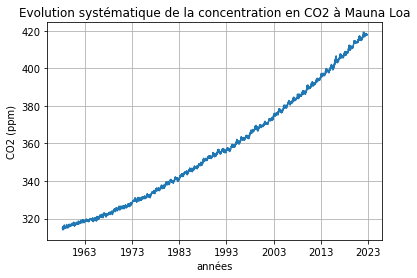

In [503]:
t = date
ppm = global_data['[ppm]']
fig, ax = plt.subplots()
ax.plot(t, ppm)

ax.set(xlabel='années', ylabel='CO2 (ppm)',
       title='Evolution systématique de la concentration en CO2 à Mauna Loa')
ax.grid()

plt.show()


D'après le modèle proposé par [Keeling et al.](https://www.rescuethatfrog.com/wp-content/uploads/2017/03/Keeling-et-al-1976-no2.pdf) en 1976, je propose le modèle systématique suivant : 

$[ppm](t)=a+b.t+c.t^2+d.t^3$

avec $t$ l'année et $(a,b,c,d)$ le tuple de coefficient inconnus en ($ppm$,$ppm/an$,$ppm/an^2$,$ppm/an^3$).

Je me ramène à l'étude de la moyenne annuelle de cette évolution systématique afin de déterminer les coefficients $(a,b,c,d)$.

In [512]:
annual_evolution=global_data.groupby(global_data.index.year)['[ppm]'].mean()
annual_evolution

1958    315.268783
1959    315.991240
1960    316.903900
1961    317.633232
1962    318.442986
1963    318.985702
1964    319.519019
1965    320.032489
1966    321.339473
1967    322.163142
1968    323.053586
1969    324.619867
1970    325.674832
1971    326.315373
1972    327.469752
1973    329.683971
1974    330.258554
1975    331.151982
1976    332.159558
1977    333.922771
1978    335.540347
1979    336.874740
1980    338.706246
1981    339.929063
1982    341.130950
1983    342.789752
1984    344.471765
1985    345.892485
1986    347.113905
1987    348.852525
           ...    
1993    356.852489
1994    358.730318
1995    360.743232
1996    362.519163
1997    363.657175
1998    366.516755
1999    368.196143
2000    369.393526
2001    370.948971
2002    373.008362
2003    375.561181
2004    377.305409
2005    379.598882
2006    381.768188
2007    383.569289
2008    385.402400
2009    387.346371
2010    389.889604
2011    391.699375
2012    393.971913
2013    396.644900
2014    398.

Je définis ma fonction modèle et j'essaye d'approximer mon évolution à l'aide d'un estimateur des moindre carrés comme précedemment. Je prends comme origine des temps le début des mesures soit l'année 1958.

In [542]:
def global_func(t,a,b,c,d):
    t=t-1958
    return a+b*t+c*t**2+d*t**3

In [543]:
popt,pcov=curve_fit(global_func, annual_evolution.index, annual_evolution)
print(popt)
print(pcov)

[3.14466208e+02 8.46851523e-01 9.66926453e-03 3.84895783e-05]
[[ 8.99233285e-02 -1.04507571e-02  3.24009066e-04 -2.93031446e-06]
 [-1.04507571e-02  1.67230097e-03 -5.89502904e-05  5.71705521e-07]
 [ 3.24009066e-04 -5.89502904e-05  2.22413968e-06 -2.25062461e-08]
 [-2.93031446e-06  5.71705521e-07 -2.25062461e-08  2.34440054e-10]]


In [544]:
perr=np.sqrt(np.diag(pcov))
perr

array([2.99872187e-01, 4.08937767e-02, 1.49135498e-03, 1.53114354e-05])

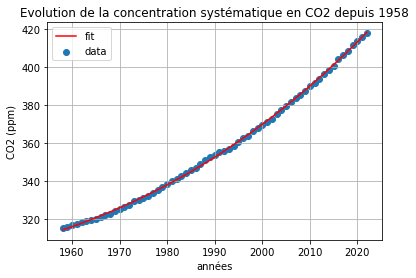

In [545]:
plt.scatter(annual_evolution.index, annual_evolution,label='data')
plt.plot(annual_evolution.index, global_func(annual_evolution.index, *popt), 'r-',label='fit')
plt.xlabel('années')
plt.ylabel('CO2 (ppm)')
plt.title('Evolution de la concentration systématique en CO2 depuis 1958')
plt.grid()
plt.legend()
plt.show()

On a à nouveau une estimation satisfaisante avec des erreurs de déviations cependant plus importantes que pour la variation saisonnière.

## Prédiction de la concentration à Mauna Loa en 2025

Maintenant que l'on dispose d'un modèle complet pour les évolutions saisonnières et globales de la concentration en $CO_2$ à Mauna Loa depuis 1958, on peut réunir les deux afin d'assurer la fiabilité du modèle.

ValueError: Cannot shift with no freq

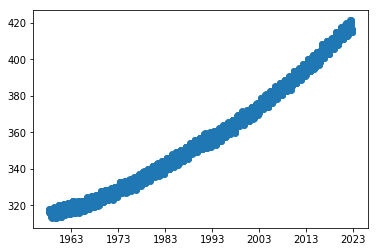

In [579]:
plt.scatter(data.index, data['[ppm]'],label='data')
plt.plot(data.index, func(data.index, *popt), 'r-',label='fit')
plt.xlabel('années')
plt.ylabel('CO2 (ppm)')
plt.title('Evolution de la concentration en CO2 à Mauna Loa depuis 1958')
plt.grid()
plt.legend()
plt.show()